In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data_is_ready.zip to data_is_ready.zip


In [ ]:
import zipfile

with zipfile.ZipFile('data_is_ready.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/flights_extracted')

In [ ]:
df = pd.read_csv('/content/flights_extracted/data_is_ready.csv')

In [ ]:
df['SATURATION'] = (df['SATURATION']).apply(lambda x: round(x, 3))
df['ORIGIN_AIRPORT_DELAY_PROB'] = (df['ORIGIN_AIRPORT_DELAY_PROB']).apply(lambda x: round(x, 3))
df['ORIGIN_AIRPORT_AVG_DELAY'] = (df['ORIGIN_AIRPORT_AVG_DELAY']).apply(lambda x: round(x, 3))
df['ORIGIN_WEATHER_DELAY_PROB'] = (df['ORIGIN_WEATHER_DELAY_PROB']).apply(lambda x: round(x, 3))
df['ORIGIN_AVG_WEATHER_DELAY'] = (df['ORIGIN_AVG_WEATHER_DELAY']).apply(lambda x: round(x, 3))
df['DESTINATION_AIRPORT_DELAY_PROB'] = (df['DESTINATION_AIRPORT_DELAY_PROB']).apply(lambda x: round(x, 3))
df['DESTINATION_AIRPORT_AVG_DELAY'] = (df['DESTINATION_AIRPORT_AVG_DELAY']).apply(lambda x: round(x, 3))
df['DESTINATION_WEATHER_DELAY_PROB'] = (df['DESTINATION_WEATHER_DELAY_PROB']).apply(lambda x: round(x, 3))
df['DESTINATION_AVG_WEATHER_DELAY'] = (df['DESTINATION_AVG_WEATHER_DELAY']).apply(lambda x: round(x, 3))
df

,TEST,MATCH,ORIENTATION,SATURATION,TFD,PFD,AIRLINE_DELAY_PROB,AIRLINE_AVG_DELAY,ORIGIN_AIRPORT_DELAY_PROB,ORIGIN_AIRPORT_AVG_DELAY,ORIGIN_WEATHER_DELAY_PROB,ORIGIN_AVG_WEATHER_DELAY,DESTINATION_AIRPORT_DELAY_PROB,DESTINATION_AIRPORT_AVG_DELAY,DESTINATION_WEATHER_DELAY_PROB,DESTINATION_AVG_WEATHER_DELAY,DELAY
0,0,0,DEPARTURE,0.312,0,0.0,0.14,25.1,0.074,21.291,0.014,42.631,0.145,35.006,0.015,39.800,-4.0
1,0,1,ARRIVAL,0.138,190,-4.0,0.14,25.1,0.074,21.291,0.014,42.631,0.145,35.006,0.015,39.800,-7.0
2,0,0,DEPARTURE,0.188,0,-0.0,0.14,25.1,0.073,20.219,0.010,30.465,0.073,25.013,0.018,37.355,-4.0
3,0,1,ARRIVAL,0.190,155,-4.0,0.14,25.1,0.073,20.219,0.010,30.465,0.073,25.013,0.018,37.355,-15.0
4,0,0,DEPARTURE,0.268,0,-0.0,0.14,25.1,0.086,24.934,0.024,34.449,0.075,24.501,0.016,31.250,144.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5205549,1,1,ARRIVAL,0.167,158,-2.0,0.12,38.0,0.123,32.312,0.025,51.386,0.082,22.812,0.012,52.629,1.0
5205550,0,1,DEPARTURE,0.375,727,1.0,0.12,38.0,0.082,22.812,0.012,52.629,0.123,32.312,0.025,51.386,0.0
5205551,0,1,ARRIVAL,0.306,70,0.0,0.12,38.0,0.082,22.812,0.012,52.629,0.123,32.312,0.025,51.386,-13.0
5205552,0,1,DEPARTURE,0.250,65,-13.0,0.12,38.0,0.123,32.312,0.025,51.386,0.082,22.812,0.012,52.629,-2.0


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def errors(true_values, pred_values):
    def create_data(rounded, selected):
        y_true, y_pred = [], []

        for a, b in zip(true_values, pred_values):
            if rounded and selected:
                if a > 0:
                    y_pred.append(np.round(b).astype(int))
                    y_true.append(a)
            elif rounded:
                y_pred.append(np.round(b).astype(int))
                y_true.append(a)
            elif selected:
                if a > 0:
                    y_pred.append(b)
                    y_true.append(a)
            else:
                y_pred.append(b)
                y_true.append(a)

        return y_true, y_pred

    def calculate_mape(y_true, y_pred):
            vals = [np.abs((true - pred) / true) for true, pred in zip(y_true, y_pred)]
            return np.mean(vals) * 100

    def accuarcy(y_true, y_pred, k):
        return sum([1 if (true <= k) == (pred <= k) else 0 for true, pred in zip(y_true, y_pred)]) / len(y_true)

    for i in range(4):
        y_true, y_pred = create_data(i // 2, i % 2)

        mae = mean_absolute_error(y_true, y_pred)
        print(f'rounded {i // 2} and selected {i % 2}: mean_absolute_error {mae}')

        mse = mean_squared_error(y_true, y_pred)
        print(f'rounded {i // 2} and selected {i % 2}: mean_squared_error {mse}')

        acc = accuarcy(y_true, y_pred, 15)
        print(f'rounded {i // 2} and selected {i % 2}: accuarcy 15 {acc}')

        acc = accuarcy(y_true, y_pred, 60)
        print(f'rounded {i // 2} and selected {i % 2}: accuarcy 60 {acc}')

        acc = accuarcy(y_true, y_pred, 90)
        print(f'rounded {i // 2} and selected {i % 2}: accuarcy 90 {acc}')

        if i % 2:
            mape = calculate_mape(y_true, y_pred)
            print(f'rounded {i // 2} and selected {i % 2}: mean_absolute_percentage_error {mape}')

        print()

In [ ]:
arrivals = df.query('ORIENTATION == "ARRIVAL"').drop(['MATCH', 'TEST', 'ORIENTATION'], axis=1)
departures = df.query('ORIENTATION == "DEPARTURE"').drop(['MATCH', 'TEST', 'ORIENTATION'], axis=1)

# Models

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

print(f'Linear Regression (test_size=0.2, random_state=42) data_size: {len(df)}')

X = df.drop(['DELAY', 'MATCH', 'TEST', 'ORIENTATION'], axis=1)
y = df['DELAY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

predictions = model_lr.predict(X_test)

errors(y_test, predictions)

Linear Regression (test_size=0.2, random_state=42) data_size: 5205554
rounded 0 and selected 0: mean_absolute_error 14.179433425419695
rounded 0 and selected 0: mean_squared_error 848.4687203487025
rounded 0 and selected 0: accuarcy 15 0.8752380870051321
rounded 0 and selected 0: accuarcy 60 0.9635235820195925
rounded 0 and selected 0: accuarcy 90 0.9772598695047886

rounded 0 and selected 1: mean_absolute_error 19.784897041088414
rounded 0 and selected 1: mean_squared_error 1825.1529134091695
rounded 0 and selected 1: accuarcy 15 0.7127365175920466
rounded 0 and selected 1: accuarcy 60 0.9112199083413509
rounded 0 and selected 1: accuarcy 90 0.9436702771484435
rounded 0 and selected 1: mean_absolute_percentage_error 124.59551804362916

rounded 1 and selected 0: mean_absolute_error 14.177327873780989
rounded 1 and selected 0: mean_squared_error 848.5521332499609
rounded 1 and selected 0: accuarcy 15 0.8764963582173274
rounded 1 and selected 0: accuarcy 60 0.9633756631137314
rounded 1 a

In [ ]:
print(f'Linear Regression (test_size=0.2, random_state=42) data_size: {len(arrivals)}')
print('Arrivals errors:')

X = arrivals.drop('DELAY', axis=1)
y = arrivals['DELAY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

predictions = model_lr.predict(X_test)

errors(y_test, predictions)

print(f'Linear Regression (test_size=0.2, random_state=42) data_size: {len(departures)}')
print('Departure errors:')

X = departures.drop('DELAY', axis=1)
y = departures['DELAY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

predictions = model_lr.predict(X_test)

errors(y_test, predictions)

Linear Regression (test_size=0.2, random_state=42) data_size: 2602777
Arrivals errors:
rounded 0 and selected 0: mean_absolute_error 9.035373302488734
rounded 0 and selected 0: mean_squared_error 165.74684334936703
rounded 0 and selected 0: accuarcy 15 0.9323473363096382
rounded 0 and selected 0: accuarcy 60 0.9863914737319328
rounded 0 and selected 0: accuarcy 90 0.9928864521780558

rounded 0 and selected 1: mean_absolute_error 12.24657507391747
rounded 0 and selected 1: mean_squared_error 295.95467420890975
rounded 0 and selected 1: accuarcy 15 0.8237155012544999
rounded 0 and selected 1: accuarcy 60 0.9632169219820578
rounded 0 and selected 1: accuarcy 90 0.980764335842333
rounded 0 and selected 1: mean_absolute_percentage_error 142.5031151961609

rounded 1 and selected 0: mean_absolute_error 9.032179054703048
rounded 1 and selected 0: mean_squared_error 165.83213141333496
rounded 1 and selected 0: accuarcy 15 0.9327449880512375
rounded 1 and selected 0: accuarcy 60 0.98650481408340

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

print(f'Random Forest (test_size=0.2, random_state=42) (n_estimators=10, random_state=42) data_size: {len(df)}')

X = df.drop(['DELAY', 'MATCH', 'TEST', 'ORIENTATION'], axis=1)
y = df['DELAY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_rf = RandomForestRegressor(n_estimators=10, random_state=42)
model_rf.fit(X_train, y_train)

predictions_rf = model_rf.predict(X_test)

errors(y_test, predictions_rf)

Random Forest (test_size=0.2, random_state=42) (n_estimators=10, random_state=42) data_size: 5205554
rounded 0 and selected 0: mean_absolute_error 13.411586494540064
rounded 0 and selected 0: mean_squared_error 777.9748454139637
rounded 0 and selected 0: accuarcy 15 0.8379692463147541
rounded 0 and selected 0: accuarcy 60 0.9610992487832709
rounded 0 and selected 0: accuarcy 90 0.9787601898356659

rounded 0 and selected 1: mean_absolute_error 19.581693851186845
rounded 0 and selected 1: mean_squared_error 1633.2726627800705
rounded 0 and selected 1: accuarcy 15 0.7126149612571512
rounded 0 and selected 1: accuarcy 60 0.9091250012931525
rounded 0 and selected 1: accuarcy 90 0.9479894064947291
rounded 0 and selected 1: mean_absolute_percentage_error 173.88629255000808

rounded 1 and selected 0: mean_absolute_error 13.408631740515661
rounded 1 and selected 0: mean_squared_error 778.095820714602
rounded 1 and selected 0: accuarcy 15 0.8401111889126135
rounded 1 and selected 0: accuarcy 60 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

print(f'Random Forest (test_size=0.2, random_state=42) (n_estimators=10, random_state=42) data_size: {len(arrivals)}')
print('Arrivals errors:')

X = arrivals.drop('DELAY', axis=1)
y = arrivals['DELAY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_rf = RandomForestRegressor(n_estimators=10, random_state=42)
model_rf.fit(X_train, y_train)

predictions_rf = model_rf.predict(X_test)

errors(y_test, predictions_rf)

print(f'Random Forest (test_size=0.2, random_state=42) (n_estimators=10, random_state=42) data_size: {len(departures)}')
print('Departures errors:')

X = departures.drop('DELAY', axis=1)
y = departures['DELAY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_rf = RandomForestRegressor(n_estimators=10, random_state=42)
model_rf.fit(X_train, y_train)

predictions_rf = model_rf.predict(X_test)

errors(y_test, predictions_rf)

Random Forest (test_size=0.2, random_state=42) (n_estimators=10, random_state=42) data_size: 2602777
Arrivals errors:
rounded 0 and selected 0: mean_absolute_error 9.445368458078262
rounded 0 and selected 0: mean_squared_error 180.26298847877672
rounded 0 and selected 0: accuarcy 15 0.923737311643704
rounded 0 and selected 0: accuarcy 60 0.985083257132758
rounded 0 and selected 0: accuarcy 90 0.9919547560685114

rounded 0 and selected 1: mean_absolute_error 12.449373914109266
rounded 0 and selected 1: mean_squared_error 308.4648510139594
rounded 0 and selected 1: accuarcy 15 0.8131392624683778
rounded 0 and selected 1: accuarcy 60 0.9597676967590789
rounded 0 and selected 1: accuarcy 90 0.9782501415532942
rounded 0 and selected 1: mean_absolute_percentage_error 144.26071119782543

rounded 1 and selected 0: mean_absolute_error 9.442198341773027
rounded 1 and selected 0: mean_squared_error 180.33983855723497
rounded 1 and selected 0: accuarcy 15 0.92451340489784
rounded 1 and selected 0:

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

print(f'KNN (test_size=0.2, random_state=42) (n_neighbors=5) data_size: {len(df)}')

X = df.drop(['DELAY', 'MATCH', 'TEST', 'ORIENTATION'], axis=1)
y = df['DELAY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

errors(y_test, predictions)

KNN (test_size=0.2, random_state=42) (n_neighbors=5) data_size: 5205554
rounded 0 and selected 0: mean_absolute_error 14.050201179317096
rounded 0 and selected 0: mean_squared_error 900.2831023781326
rounded 0 and selected 0: accuarcy 15 0.8770342451477317
rounded 0 and selected 0: accuarcy 60 0.9647808927194123
rounded 0 and selected 0: accuarcy 90 0.9795583756198907

rounded 0 and selected 1: mean_absolute_error 26.772932766415277
rounded 0 and selected 1: mean_squared_error 2266.365977675015
rounded 0 and selected 1: accuarcy 15 0.6760704716385794
rounded 0 and selected 1: accuarcy 60 0.9059645365858705
rounded 0 and selected 1: accuarcy 90 0.9453280986520178
rounded 0 and selected 1: mean_absolute_percentage_error 213.6645505379209

rounded 1 and selected 0: mean_absolute_error 14.050201179317096
rounded 1 and selected 0: mean_squared_error 900.2831023781326
rounded 1 and selected 0: accuarcy 15 0.8770342451477317
rounded 1 and selected 0: accuarcy 60 0.9647808927194123
rounded 1 a

In [ ]:
print(f'KNN (test_size=0.2, random_state=42) (n_neighbors=5) data_size: {len(arrivals)}')
print('Arrivals errors:')

X = arrivals.drop('DELAY', axis=1)
y = arrivals['DELAY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

errors(y_test, predictions)

print(f'KNN (test_size=0.2, random_state=42) (n_neighbors=5) data_size: {len(departures)}')
print('Departures errors:')

X = departures.drop('DELAY', axis=1)
y = departures['DELAY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

errors(y_test, predictions)

KNN (test_size=0.2, random_state=42) (n_neighbors=5) data_size: 2602777
Arrivals errors:
rounded 0 and selected 0: mean_absolute_error 12.256339375590715
rounded 0 and selected 0: mean_squared_error 298.03114554437946
rounded 0 and selected 0: accuarcy 15 0.9196858743343655
rounded 0 and selected 0: accuarcy 60 0.9829643688671343
rounded 0 and selected 0: accuarcy 90 0.9910461122338423

rounded 0 and selected 1: mean_absolute_error 18.73154222963321
rounded 0 and selected 1: mean_squared_error 599.9495862488118
rounded 0 and selected 1: accuarcy 15 0.7856545476268395
rounded 0 and selected 1: accuarcy 60 0.9539445318871521
rounded 0 and selected 1: accuarcy 90 0.975787893427252
rounded 0 and selected 1: mean_absolute_percentage_error 234.00849301826275

rounded 1 and selected 0: mean_absolute_error 12.256339375590715
rounded 1 and selected 0: mean_squared_error 298.03114554437946
rounded 1 and selected 0: accuarcy 15 0.9196858743343655
rounded 1 and selected 0: accuarcy 60 0.9829643688

## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

print(f'Ridge Regression (test_size=0.2, random_state=42) (alpha=1.0) data_size: {len(df)}')

X = df.drop(['DELAY', 'MATCH', 'TEST', 'ORIENTATION'], axis=1)
y = df['DELAY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

predictions = ridge.predict(X_test)

errors(y_test, predictions)

Ridge Regression (test_size=0.2, random_state=42) (alpha=1.0) data_size: 5205554
rounded 0 and selected 0: mean_absolute_error 14.179298344082534
rounded 0 and selected 0: mean_squared_error 848.4684644790862
rounded 0 and selected 0: accuarcy 15 0.8752448105917621
rounded 0 and selected 0: accuarcy 60 0.9635245425319683
rounded 0 and selected 0: accuarcy 90 0.9772598695047886

rounded 0 and selected 1: mean_absolute_error 19.78463949830141
rounded 0 and selected 1: mean_squared_error 1825.1630575535692
rounded 0 and selected 1: accuarcy 15 0.7127494491170355
rounded 0 and selected 1: accuarcy 60 0.9112199083413509
rounded 0 and selected 1: accuarcy 90 0.9436702771484435
rounded 0 and selected 1: mean_absolute_percentage_error 124.5819027468151

rounded 1 and selected 0: mean_absolute_error 14.177199165122643
rounded 1 and selected 0: mean_squared_error 848.5520333566737
rounded 1 and selected 0: accuarcy 15 0.8765050028287089
rounded 1 and selected 0: accuarcy 60 0.9633747026013557
ro

In [ ]:
print(f'Ridge Regression (test_size=0.2, random_state=42) (alpha=3.0) data_size: {len(arrivals)}')
print('Arrivals errors:')

X = arrivals.drop('DELAY', axis=1)
y = arrivals['DELAY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=3.0)
ridge.fit(X_train, y_train)

predictions = ridge.predict(X_test)

errors(y_test, predictions)

print(f'Ridge Regression (test_size=0.2, random_state=42) (alpha=3.0) data_size: {len(departures)}')
print('Departures errors:')

X = departures.drop('DELAY', axis=1)
y = departures['DELAY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=3.0)
ridge.fit(X_train, y_train)

predictions = ridge.predict(X_test)

errors(y_test, predictions)

Ridge Regression (test_size=0.2, random_state=42) (alpha=3.0) data_size: 2602777
Arrivals errors:
rounded 0 and selected 0: mean_absolute_error 9.034984524185171
rounded 0 and selected 0: mean_squared_error 165.74736432161473
rounded 0 and selected 0: accuarcy 15 0.9323569414241696
rounded 0 and selected 0: accuarcy 60 0.9864029998693704
rounded 0 and selected 0: accuarcy 90 0.9928902942238683

rounded 0 and selected 1: mean_absolute_error 12.246775755810756
rounded 0 and selected 1: mean_squared_error 295.979342520358
rounded 0 and selected 1: accuarcy 15 0.8237362797196985
rounded 0 and selected 1: accuarcy 60 0.9632480896798558
rounded 0 and selected 1: accuarcy 90 0.9807747250749324
rounded 0 and selected 1: mean_absolute_percentage_error 142.49695150941446

rounded 1 and selected 0: mean_absolute_error 9.031885138198389
rounded 1 and selected 0: mean_squared_error 165.8310114569806
rounded 1 and selected 0: accuarcy 15 0.9327334619137999
rounded 1 and selected 0: accuarcy 60 0.986

# Data Visualization


Comparison for Combined Dataset:
                      MAE      MSE  Accuracy_15  Accuracy_60  Accuracy_90
Linear Regression  14.179  848.469        0.875        0.964        0.977
Random Forest      13.412  777.975        0.838        0.961        0.979
KNN                14.050  900.283        0.877        0.965        0.980
Ridge Regression   14.179  848.468        0.875        0.964        0.977

Comparison for Arrivals Dataset:
                      MAE      MSE  Accuracy_15  Accuracy_60  Accuracy_90
Linear Regression   9.035  165.747        0.932        0.986        0.993
Random Forest       9.445  180.263        0.924        0.985        0.992
KNN                12.256  298.031        0.920        0.983        0.991
Ridge Regression    9.035  165.747        0.932        0.986        0.993

Comparison for Departures Dataset:
                      MAE       MSE  Accuracy_15  Accuracy_60  Accuracy_90
Linear Regression  17.098  1248.703        0.815        0.944        0.967
Random

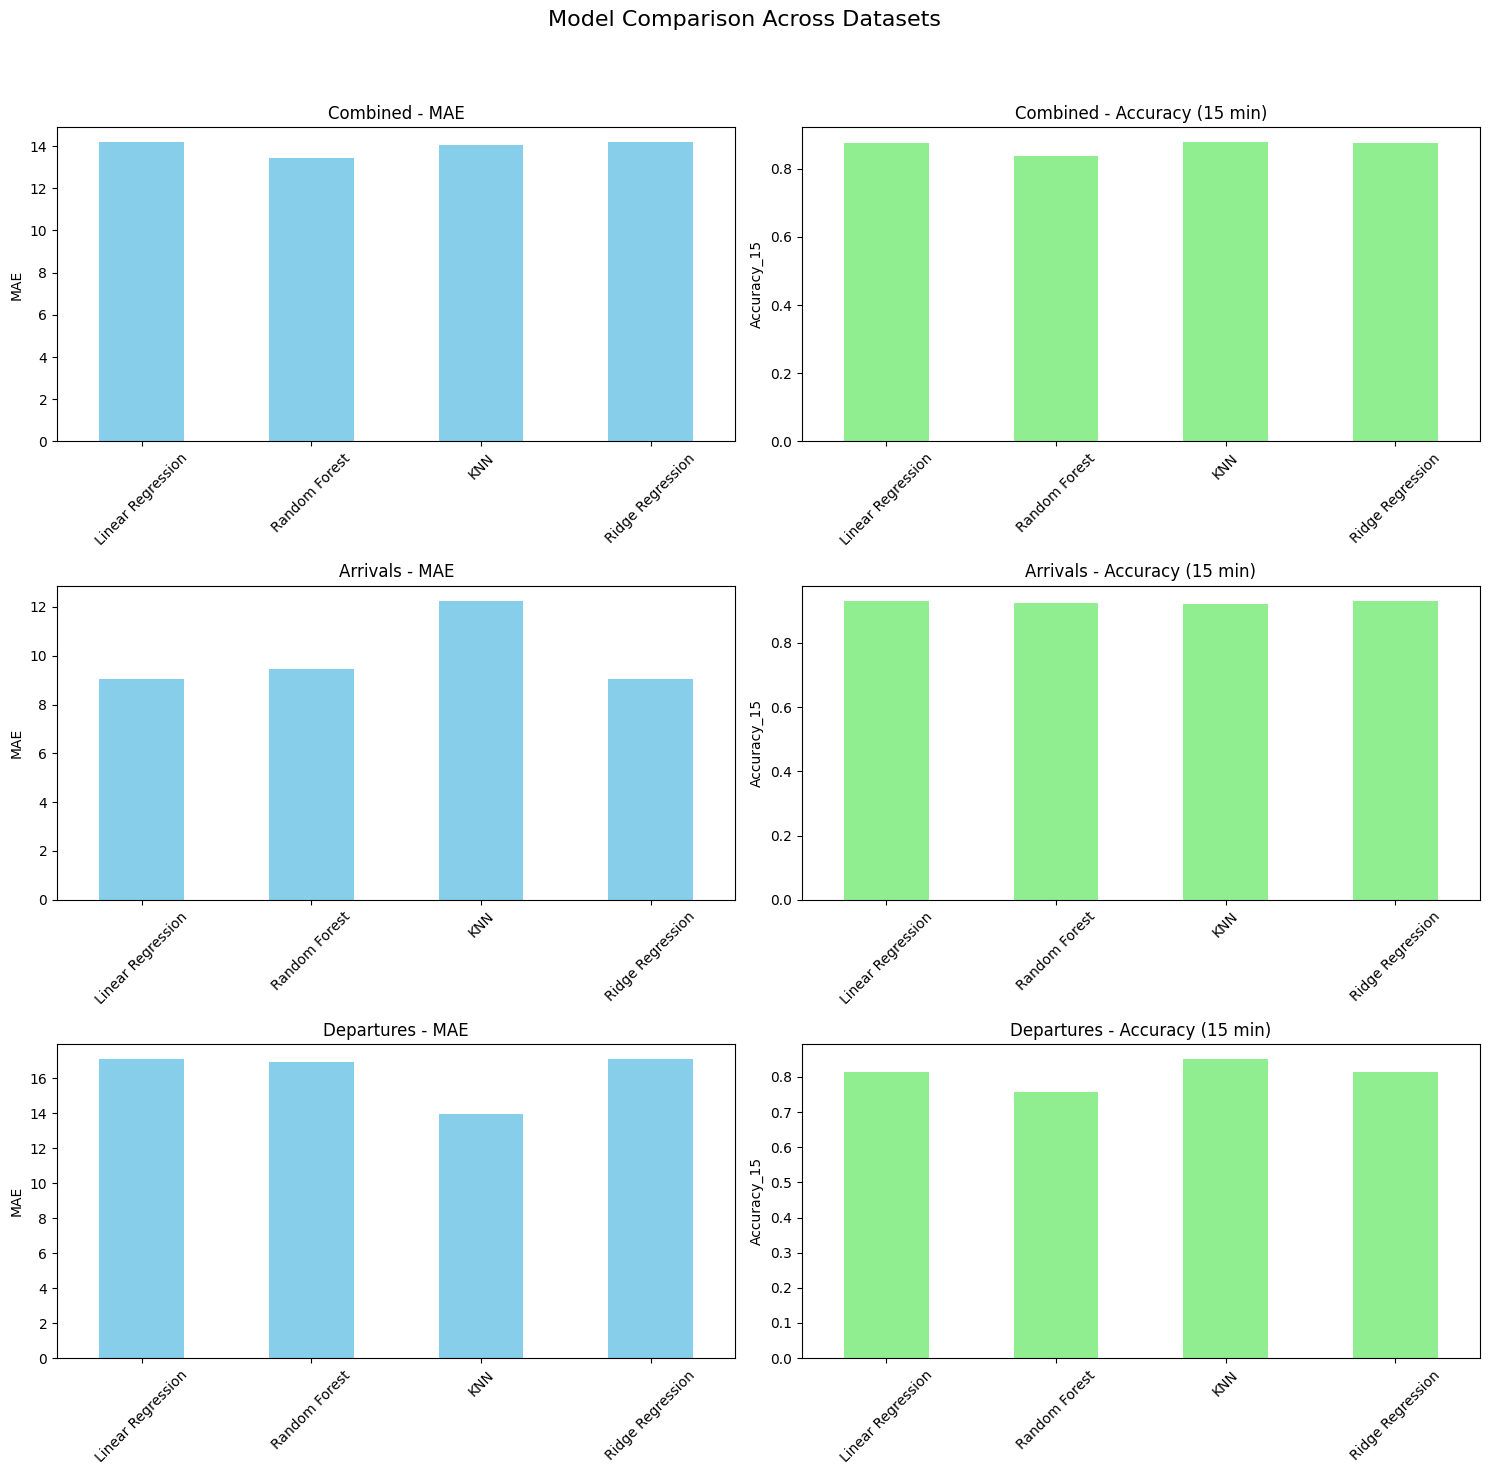


Ranking for Combined based on MAE:
Linear Regression    3.5
Random Forest        1.0
KNN                  2.0
Ridge Regression     3.5
Name: MAE, dtype: float64

Ranking for Arrivals based on MAE:
Linear Regression    1.5
Random Forest        3.0
KNN                  4.0
Ridge Regression     1.5
Name: MAE, dtype: float64

Ranking for Departures based on MAE:
Linear Regression    3.5
Random Forest        2.0
KNN                  1.0
Ridge Regression     3.5
Name: MAE, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

model_metrics = {
    'Linear Regression': {
        'Combined': {'MAE': 14.179, 'MSE': 848.469, 'Accuracy_15': 0.875, 'Accuracy_60': 0.964, 'Accuracy_90': 0.977},
        'Arrivals': {'MAE': 9.035, 'MSE': 165.747, 'Accuracy_15': 0.932, 'Accuracy_60': 0.986, 'Accuracy_90': 0.993},
        'Departures': {'MAE': 17.098, 'MSE': 1248.703, 'Accuracy_15': 0.815, 'Accuracy_60': 0.944, 'Accuracy_90': 0.967}
    },
    'Random Forest': {
        'Combined': {'MAE': 13.412, 'MSE': 777.975, 'Accuracy_15': 0.838, 'Accuracy_60': 0.961, 'Accuracy_90': 0.979},
        'Arrivals': {'MAE': 9.445, 'MSE': 180.263, 'Accuracy_15': 0.924, 'Accuracy_60': 0.985, 'Accuracy_90': 0.992},
        'Departures': {'MAE': 16.921, 'MSE': 1341.066, 'Accuracy_15': 0.756, 'Accuracy_60': 0.939, 'Accuracy_90': 0.967}
    },
    'KNN': {
        'Combined': {'MAE': 14.050, 'MSE': 900.283, 'Accuracy_15': 0.877, 'Accuracy_60': 0.965, 'Accuracy_90': 0.980},
        'Arrivals': {'MAE': 12.256, 'MSE': 298.031, 'Accuracy_15': 0.920, 'Accuracy_60': 0.983, 'Accuracy_90': 0.991},
        'Departures': {'MAE': 13.938, 'MSE': 1311.312, 'Accuracy_15': 0.851, 'Accuracy_60': 0.953, 'Accuracy_90': 0.972}
    },
    'Ridge Regression': {
        'Combined': {'MAE': 14.179, 'MSE': 848.468, 'Accuracy_15': 0.875, 'Accuracy_60': 0.964, 'Accuracy_90': 0.977},
        'Arrivals': {'MAE': 9.035, 'MSE': 165.747, 'Accuracy_15': 0.932, 'Accuracy_60': 0.986, 'Accuracy_90': 0.993},
        'Departures': {'MAE': 17.098, 'MSE': 1248.700, 'Accuracy_15': 0.815, 'Accuracy_60': 0.944, 'Accuracy_90': 0.967}
    }
}

datasets = ['Combined', 'Arrivals', 'Departures']
metrics = ['MAE', 'MSE', 'Accuracy_15', 'Accuracy_60', 'Accuracy_90']

dfs = {}
for dataset in datasets:
    data = {metric: [model_metrics[model][dataset][metric] for model in model_metrics] for metric in metrics}
    dfs[dataset] = pd.DataFrame(data, index=model_metrics.keys())

for dataset, df in dfs.items():
    print(f"\nComparison for {dataset} Dataset:")
    print(df)

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Model Comparison Across Datasets', fontsize=16)

for i, dataset in enumerate(datasets):
    dfs[dataset]['MAE'].plot(kind='bar', ax=axes[i, 0], color='skyblue', title=f'{dataset} - MAE')
    axes[i, 0].set_ylabel('MAE')
    axes[i, 0].tick_params(axis='x', rotation=45)

    dfs[dataset]['Accuracy_15'].plot(kind='bar', ax=axes[i, 1], color='lightgreen', title=f'{dataset} - Accuracy (15 min)')
    axes[i, 1].set_ylabel('Accuracy_15')
    axes[i, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

for dataset, df in dfs.items():
    print(f"\nRanking for {dataset} based on MAE:")
    print(df['MAE'].rank(ascending=True))

In [ ]:
print("Columns in df:", df.columns.tolist())
print("Columns in arrivals:", arrivals.columns.tolist())
print("Columns in departures:", departures.columns.tolist())

Columns in df: ['MAE', 'MSE', 'Accuracy_15', 'Accuracy_60', 'Accuracy_90']
Columns in arrivals: ['SATURATION', 'TFD', 'PFD', 'AIRLINE_DELAY_PROB', 'AIRLINE_AVG_DELAY', 'ORIGIN_AIRPORT_DELAY_PROB', 'ORIGIN_AIRPORT_AVG_DELAY', 'ORIGIN_WEATHER_DELAY_PROB', 'ORIGIN_AVG_WEATHER_DELAY', 'DESTINATION_AIRPORT_DELAY_PROB', 'DESTINATION_AIRPORT_AVG_DELAY', 'DESTINATION_WEATHER_DELAY_PROB', 'DESTINATION_AVG_WEATHER_DELAY', 'DELAY']
Columns in departures: ['SATURATION', 'TFD', 'PFD', 'AIRLINE_DELAY_PROB', 'AIRLINE_AVG_DELAY', 'ORIGIN_AIRPORT_DELAY_PROB', 'ORIGIN_AIRPORT_AVG_DELAY', 'ORIGIN_WEATHER_DELAY_PROB', 'ORIGIN_AVG_WEATHER_DELAY', 'DESTINATION_AIRPORT_DELAY_PROB', 'DESTINATION_AIRPORT_AVG_DELAY', 'DESTINATION_WEATHER_DELAY_PROB', 'DESTINATION_AVG_WEATHER_DELAY', 'DELAY']



Combined - Linear Regression:
Confusion Matrix:
[[811914  41438]
 [ 88453  99306]]
F1 Score: 0.605

Combined - Random Forest:
Confusion Matrix:
[[758920  94432]
 [ 74260 113499]]
F1 Score: 0.574

Combined - KNN:
Confusion Matrix:
[[845896   7456]
 [120565  67194]]
F1 Score: 0.512

Combined - Ridge Regression:
Confusion Matrix:
[[811927  41425]
 [ 88456  99303]]
F1 Score: 0.605

Arrivals - Linear Regression:
Confusion Matrix:
[[415352  10474]
 [ 24743  69987]]
F1 Score: 0.799

Arrivals - Random Forest:
Confusion Matrix:
[[410232  15594]
 [ 24105  70625]]
F1 Score: 0.781

Arrivals - KNN:
Confusion Matrix:
[[422456   3370]
 [ 38438  56292]]
F1 Score: 0.729

Arrivals - Ridge Regression:
Confusion Matrix:
[[415355  10471]
 [ 24741  69989]]
F1 Score: 0.799

Departures - Linear Regression:
Confusion Matrix:
[[395822  31472]
 [ 64979  28283]]
F1 Score: 0.370

Departures - Random Forest:
Confusion Matrix:
[[349613  77681]
 [ 49225  44037]]
F1 Score: 0.410

Departures - KNN:
Confusion Matrix:
[

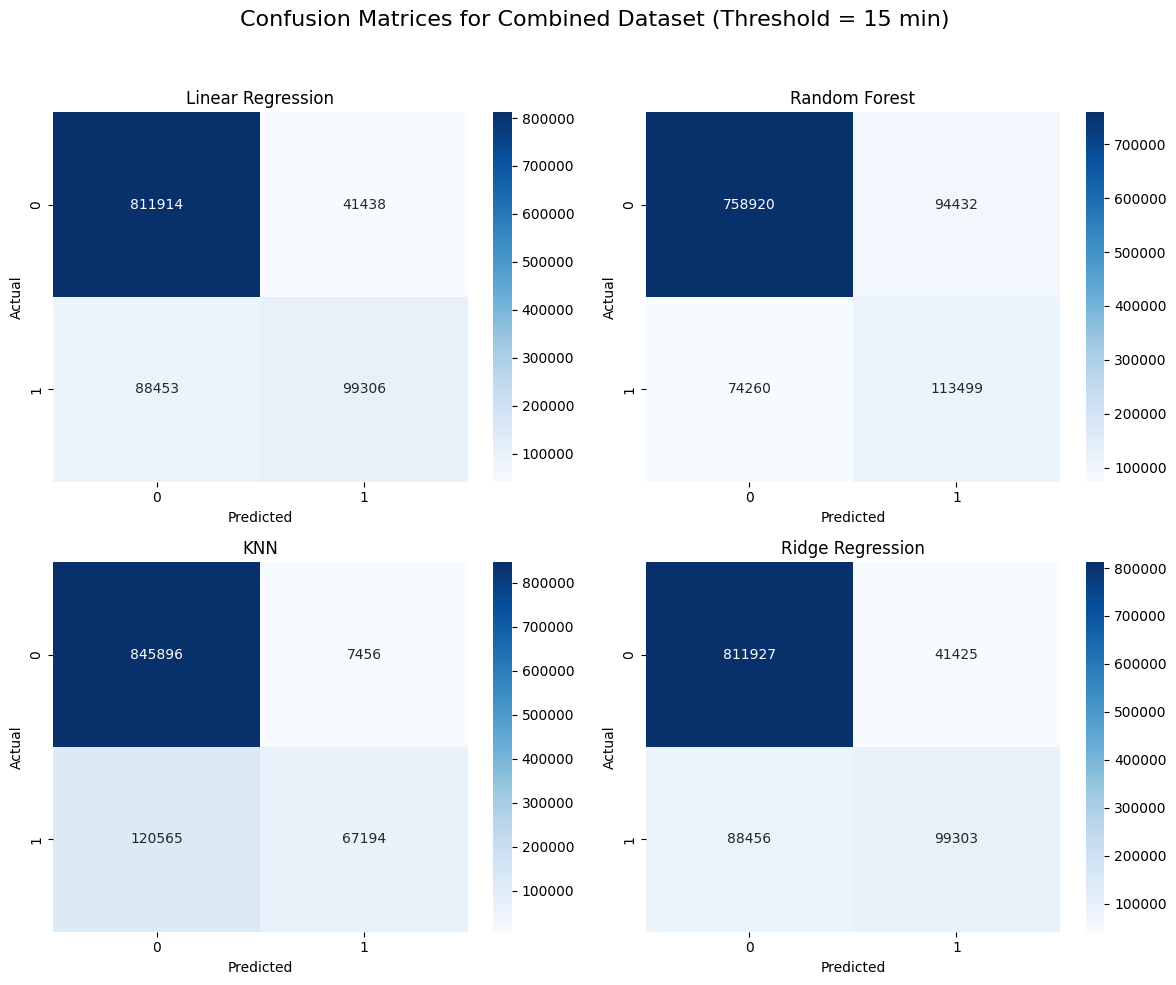


F1 Score Comparison Across Datasets:
                   Combined  Arrivals  Departures
Linear Regression  0.604597  0.798979    0.369671
Random Forest      0.573676  0.780607    0.409685
KNN                0.512132  0.729209    0.318941
Ridge Regression   0.604608  0.799007    0.369440

Ranking based on F1 Score:
Combined:
Linear Regression    2.0
Random Forest        3.0
KNN                  4.0
Ridge Regression     1.0
Name: Combined, dtype: float64
Arrivals:
Linear Regression    2.0
Random Forest        3.0
KNN                  4.0
Ridge Regression     1.0
Name: Arrivals, dtype: float64
Departures:
Linear Regression    2.0
Random Forest        1.0
KNN                  4.0
Ridge Regression     3.0
Name: Departures, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

df = pd.read_csv('/content/flights_extracted/data_is_ready.csv')

columns_to_round = [
    'SATURATION', 'ORIGIN_AIRPORT_DELAY_PROB', 'ORIGIN_AIRPORT_AVG_DELAY',
    'ORIGIN_WEATHER_DELAY_PROB', 'ORIGIN_AVG_WEATHER_DELAY',
    'DESTINATION_AIRPORT_DELAY_PROB', 'DESTINATION_AIRPORT_AVG_DELAY',
    'DESTINATION_WEATHER_DELAY_PROB', 'DESTINATION_AVG_WEATHER_DELAY'
]
for col in columns_to_round:
    df[col] = df[col].apply(lambda x: round(x, 3))

arrivals = df.query('ORIENTATION == "ARRIVAL"').drop(['MATCH', 'TEST', 'ORIENTATION'], axis=1)
departures = df.query('ORIENTATION == "DEPARTURE"').drop(['MATCH', 'TEST', 'ORIENTATION'], axis=1)

datasets = {
    'Combined': df.drop(['DELAY', 'MATCH', 'TEST', 'ORIENTATION'], axis=1),
    'Arrivals': arrivals.drop('DELAY', axis=1),
    'Departures': departures.drop('DELAY', axis=1)
}
y_dict = {
    'Combined': df['DELAY'],
    'Arrivals': arrivals['DELAY'],
    'Departures': departures['DELAY']
}

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=10, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Ridge Regression': Ridge(alpha=3.0)
}

threshold = 15

results = {dataset: {} for dataset in datasets.keys()}

for dataset_name, X in datasets.items():
    y = y_dict[dataset_name]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        y_true_binary = (y_test > threshold).astype(int)
        y_pred_binary = (predictions > threshold).astype(int)

        cm = confusion_matrix(y_true_binary, y_pred_binary)
        f1 = f1_score(y_true_binary, y_pred_binary)

        results[dataset_name][model_name] = {
            'Confusion Matrix': cm,
            'F1 Score': f1
        }

        print(f"\n{dataset_name} - {model_name}:")
        print("Confusion Matrix:")
        print(cm)
        print(f"F1 Score: {f1:.3f}")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Confusion Matrices for Combined Dataset (Threshold = 15 min)', fontsize=16)

for ax, (model_name, result) in zip(axes.flatten(), results['Combined'].items()):
    sns.heatmap(result['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(model_name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

f1_data = {dataset: [results[dataset][model]['F1 Score'] for model in models] for dataset in datasets}
f1_df = pd.DataFrame(f1_data, index=models.keys())
print("\nF1 Score Comparison Across Datasets:")
print(f1_df)

print("\nRanking based on F1 Score:")
for dataset in datasets:
    print(f"{dataset}:")
    print(f1_df[dataset].rank(ascending=False))